In [4]:
# loading the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [16]:
# Load the three datasets
def load_datasets():
    Spam = pd.read_csv(r"E:\Coding\Applied Machine Learning\02-experimental-tracking\data\raw\raw_data.csv")
    return Spam

In [17]:
# Visualize the data
def visualize_data(df):
    plt.figure(figsize=(5, 5))
    custom_palette = ["#FF5733", "#33FF57"]
    sns.histplot(data=df, x='spam', hue='spam', bins=2, palette=custom_palette)
    plt.xlabel("Email Type")
    plt.title("Spam and Normal Email Frequency")
    plt.legend(["Spam", "Normal"])
    plt.show()

In [18]:
data = load_datasets()

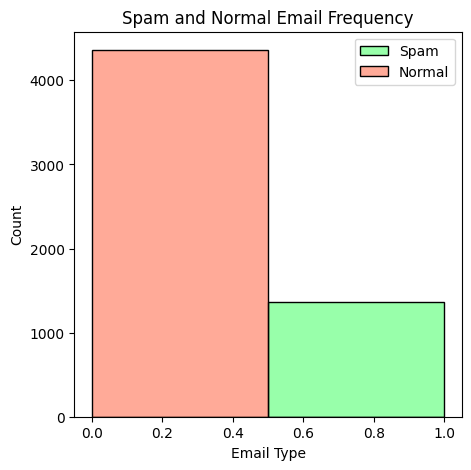

In [19]:
visualize_data(data)

In [20]:
# Pre-processing the text data
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'\d+', '', text)
        text = re.sub('\W+', ' ', text.lower())
        text = text.translate(str.maketrans('', '', string.punctuation))
        return text
    else:
        return ""

In [21]:
def preprocess_text(df):
    df['text'] = df['text'].apply(clean_text)
    stopwords_list = stopwords.words('english')
    df['text'] = df['text'].map(lambda x: " ".join(word for word in x.split() if word not in stopwords_list))
    lemmatizer = WordNetLemmatizer()
    df['text'] = df['text'].map(lambda x: " ".join(lemmatizer.lemmatize(word) for word in x.split()))
    pattern = r'[^\x00-\x7F]+'
    df['text'] = df['text'].apply(lambda x: re.sub(pattern, '', x))
    return df

In [22]:
data = preprocess_text(data)

In [25]:
# Split the dataset into train, validation and test
def split_data(df, random_state=None):
    train_df, test_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=random_state)
    train_df, val_df = train_test_split(train_df, test_size=0.25, shuffle=True, random_state=random_state) # 0.25*0.8=0.2
    return train_df, val_df, test_df

In [26]:
train, val, test= split_data(data)

In [27]:
# saving the datasets for future use
datasets = ['train', 'val', 'test']
for dataset in datasets:
    globals()[f'{dataset}'].to_csv(f'E:/Coding/Applied Machine Learning/02-experimental-tracking/data/prepared/{dataset}.csv', index=False)